In [1]:
from functions import *

In [2]:
# load and split the data
train_ft = pd.read_csv('pump_data/training_set_features.csv')
train_labels = pd.read_csv('pump_data/training_set_labels.csv')
xtrain, xtest, ytrain, ytest = train_test_split(train_ft, train_labels, random_state=17)

In [3]:
# merge them for EDA purposes
df = xtrain.merge(ytrain, on='id')

# a numeric version of our target
df['status_group_numeric'] = df['status_group'].map(lambda x: 1 if x == 'functional' else 0 if x == 'non functional' else 0.5)

In [4]:
# columns we won't mess with

# just irrelevant
df = df.drop(['id'], axis=1)

# too many different values with too few values so we end up using predictors that don't exist in test data
df = df.drop(['funder', 'installer','subvillage', 'scheme_management', 'wpt_name', 'ward'], axis=1)

# not clear what it indicates and almost all have a 0 value 
df = df.drop(['num_private'], axis=1)

# too much missing data
df = df.drop(['scheme_name', 'construction_year'], axis=1)

# not very predictive or else redundant
df = df.drop(['region', 'region_code', 'lga', 'population', 'recorded_by', 'extraction_type', 'extraction_type_group', 'management', 'management_group', 'payment_type', 'water_quality', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type'], axis=1)

df.head()

amount_tsh date_recorded  gps_height  longitude  latitude          basin  \
0         0.0    2011-07-29           0  33.037573 -2.503828  Lake Victoria   
1       200.0    2013-01-20        1155  33.378965 -2.154466  Lake Victoria   
2         0.0    2011-04-09           0  33.429493 -9.026036     Lake Rukwa   
3         0.0    2011-03-12          13  39.213282 -7.211929    Wami / Ruvu   
4         0.0    2011-03-02         -37  39.655339 -7.916720         Rufiji   

   district_code public_meeting permit extraction_type_class      payment  \
0              2           True   True                 other    never pay   
1              4           True  False                 other  pay monthly   
2              2          False  False               gravity    never pay   
3              4           True  False              handpump    never pay   
4             60           True  False           submersible    never pay   

  quality_group      quantity waterpoint_type_group    status_group  \
0          good  insufficient                 other  non functional   
1          good        enough             hand pump  non functional   
2          good      seasonal    communal standpipe      functional   
3          good        enough             hand pump      functional   
4          good        enough    communal standpipe      functional   

   status_group_numeric  
0                   0.0  
1                   0.0  
2                   1.0  
3                   1.0  
4                   1.0

In [5]:
to_drop = [df.loc[df['amount_tsh'] > 40005].index, df.loc[df['longitude'] == 0].index, df.loc[df['district_code'] == 0].index]
for i in to_drop:
    df = df.drop(i)

In [6]:
features = ['quantity', 'amount_tsh', 'public_meeting', 'gps_height', 'longitude', 'latitude', 'basin', 'district_code', 'permit', 'extraction_type_class', 'payment', 'quality_group', 'quantity', 'waterpoint_type_group']
xtrain_ft = df[features]

In [7]:
pipeline = Pipeline(steps=[
    ('cleaner', Cleaner()),
    ('randforest', RandomForestClassifier())
], verbose=True)

pipeline.fit(xtrain_ft, df['status_group'])


pipeline.score(xtest[features], ytest['status_group'])

[Pipeline] ........... (step 1 of 2) Processing cleaner, total=   0.1s
[Pipeline] ........ (step 2 of 2) Processing randforest, total=  18.5s


0.7787205387205387

In [11]:
df['date_recorded_datetime'] = pd.to_datetime(df['date_recorded'])
df['date_recorded_datetime'].sort_values(ascending=False)

21455   2013-12-03
29999   2013-12-03
42641   2013-12-03
8631    2013-12-03
32361   2013-12-03
           ...    
31977   2004-04-01
20070   2004-03-06
23219   2004-03-01
24741   2004-01-07
4989    2002-10-14
Name: date_recorded_datetime, Length: 43154, dtype: datetime64[ns]

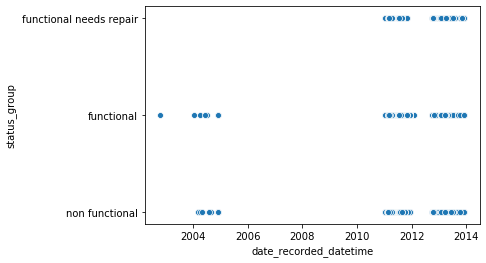

In [12]:
sns.scatterplot(data=df, x='date_recorded_datetime', y='status_group')

In [ ]:
df['year_recorded']

In [17]:
len(df.loc[df['date_recorded_datetime'] < '2008-12-12'])

24

In [ ]:
df.columns


In [10]:
df['quality_group'].value_counts(normalize=True).sort_values(ascending=False)

good        0.859781
salty       0.085183
unknown     0.028711
milky       0.014159
colored     0.008458
fluoride    0.003708
Name: quality_group, dtype: float64

In [ ]:
df['waterpoint_type_group'] = df['waterpoint_type_group'].map(lambda x: 'other' if x == 'dam' else 'other' if x == 'cattle trough' else 'other' if x == 'improved spring' else x)


In [9]:
assess_categorical_correlation('water_quality', df)

percent working for soft is 0.5682289841791769
percent broken for soft is 0.3590545238929467
percent fixable for soft is 0.07271649192787645


percent working for milky is 0.5400981996726678
percent broken for milky is 0.44844517184942717
percent fixable for milky is 0.011456628477905073


percent working for unknown is 0.15012106537530268
percent broken for unknown is 0.8329297820823245
percent fixable for unknown is 0.01694915254237288


percent working for coloured is 0.4958904109589041
percent broken for coloured is 0.38904109589041097
percent fixable for coloured is 0.11506849315068493


percent working for salty is 0.45656508117345485
percent broken for salty is 0.5035602392480775
percent fixable for salty is 0.03987467957846767


percent working for fluoride is 0.7449664429530202
percent broken for fluoride is 0.18791946308724833
percent fixable for fluoride is 0.06711409395973154


percent working for salty abandoned is 0.5696969696969697
percent broken for salty abandoned is 0

In [ ]:
len(df.loc[df['waterpoint_type_group'] == 'improved spring'])

In [ ]:
df['status_group_numeric'] = df['status_group'].map(lambda x: 1 if x == 'functional' else 0 if x == 'non functional' else 0.5)
df.head()

In [ ]:
cons_rem = df.drop(df.loc[df['construction_year'] == 0].index)

In [ ]:
fig = plt.figure(figsize=(15, 15))
sns.scatterplot(data=cons_rem, x='construction_year', y='status_group_numeric')

In [ ]:
fig = plt.figure(figsize=(20, 20))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='district_code')

In [ ]:
df['scheme_management'].unique()

In [ ]:
df['gps_height'].value_counts(normalize=True).sort_values(ascending=False)

In [ ]:
df['public_meeting'].unique()

In [ ]:
df['public_meeting'].

In [ ]:
df['scheme_management'] = df['scheme_management'].fillna(value='unknown', axis=0)

assess_categorical_correlation('scheme_management')

In [ ]:
df['status_group'].unique()

In [ ]:
df['funder'] = df['funder'].fillna(value='unknown', axis=0)
df.isna().sum()

In [ ]:
def assess_categorical_correlation(column_name):
    for value in df[column_name].unique():
        all_working = len(df.loc[(df[column_name] == value) & (df['status_group'] == 'functional')])
        all_broken = len(df.loc[(df[column_name] == value) & (df['status_group'] == 'non functional')])
        all_fixable = len(df.loc[(df[column_name] == value) & (df['status_group'] == 'functional needs repair')])
        total_val = len(df.loc[df[column_name] == value])
        print(f'percent working for {value} is {all_working / total_val}')
        print(f'percent broken for {value} is {all_broken / total_val}')
        print(f'percent fixable for {value} is {all_fixable / total_val}')
        print('\n')

In [ ]:
len(df.loc[(df['public_meeting'] == True) & (df['status_group'] == 'functional')])